In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip show keras


Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorflow.keras.models import Model

In [6]:
train_path = '/content/gdrive/MyDrive/Training'
val_path = '/content/gdrive/MyDrive/Validation'
test_path = '/content/gdrive/MyDrive/Test'
print(train_path)
batch_size = 32
img_height = 224
img_width = 224
input_shape = (img_height , img_width , 3)
model_name = 'inceptionresnetv2'

/content/gdrive/MyDrive/Training


In [7]:

train_datagen = ImageDataGenerator(
    rescale=1. / 224,
    featurewise_center=True,
    horizontal_flip = True,
    vertical_flip = True,
    featurewise_std_normalization=True)

valid_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle = True,
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle = True,
    class_mode='categorical')

Found 2549 images belonging to 4 classes.
Found 280 images belonging to 4 classes.


In [8]:
def resnet50():

  base_model = tf.keras.applications.ResNet50(weights = None , include_top = False , input_shape=(224,224,3))
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  pred = tf.keras.layers.Dense(4 , activation='softmax')(x)
  model = tf.keras.models.Model(inputs = base_model.input , outputs = pred)
  return model 

def densenet121():

  base_model = tf.keras.applications.DenseNet121(weights = None , include_top = False , input_shape=(224,224,3))
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  pred = tf.keras.layers.Dense(4 , activation='softmax')(x)
  model = tf.keras.models.Model(inputs = base_model.input , outputs = pred)
  return model

def mobilenetv2():

  base_model = tf.keras.applications.MobileNetV2(weights = None , include_top = False , input_shape=(224,224,3))
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  pred = tf.keras.layers.Dense(4 , activation='softmax')(x)
  model = tf.keras.models.Model(inputs = base_model.input , outputs = pred)
  return model 

def inceptionresnetv2():

  base_model = tf.keras.applications.InceptionResNetV2(weights = None , include_top = False , input_shape=(224,224,3))
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  pred = tf.keras.layers.Dense(4 , activation='softmax')(x)
  model = tf.keras.models.Model(inputs = base_model.input , outputs = pred)
  return model 

model = None

if(model_name == 'resnet50'):
  model =  resnet50()
elif(model_name == 'densenet121'):
  model = densenet121()
elif(model_name == 'mobilenetv2'):
  model = mobilenetv2()
elif(model_name == 'inceptionresnetv2'):
  model = inceptionresnetv2()


adam = tf.keras.optimizers.Adam(lr = 0.00001)
model.compile(optimizer = adam , loss = 'categorical_crossentropy' , metrics = ["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss' ,
                                                  factor = 0.1 , patience = 3 , verbose=1 , cooldown = 1)

history = model.fit_generator(train_generator , validation_data = validation_generator , 
                                  steps_per_epoch= len(train_generator) ,
                                  validation_steps = len(validation_generator)
                                  ,epochs = 5 , callbacks = [reduce_lr] )
     

<ipython-input-10-935e3b47d052>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator , validation_data = validation_generator ,
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
80/80 [==============================] - 3055s 37s/step - loss: 0.4202 - acc: 0.8231 - val_loss: 6.4834 - val_acc: 0.2500 - lr: 0.0010
Epoch 2/5
80/80 [==============================] - 2776s 35s/step - loss: 0.2847 - acc: 0.8796 - val_loss: 6.5919 - val_acc: 0.2500 - lr: 0.0010
Epoch 3/5
80/80 [==============================] - 2792s 35s/step - loss: 0.2649 - acc: 0.8862 - val_loss: 8.5065 - val_acc: 0.2500 - lr: 0.0010
Epoch 4/5
80/80 [==============================] - ETA: 0s - loss: 0.1848 - acc: 0.9219 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
80/80 [==============================] - 2816s 35s/step - loss: 0.1848 - acc: 0.9219 - val_loss: 8.2015 - val_acc: 0.2500 - lr: 0.0010
Epoch 5/5
77/80 [===========================>..] - ETA: 1:39 - loss: 0.1449 - acc: 0.9348

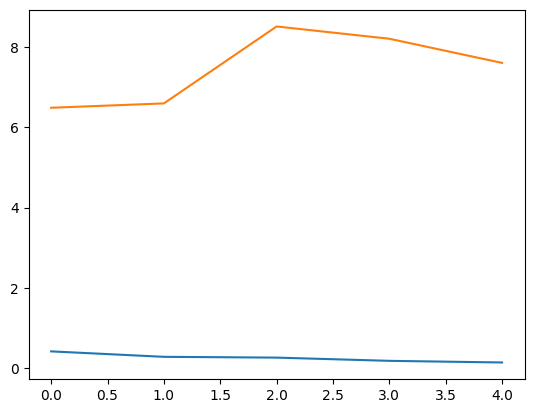

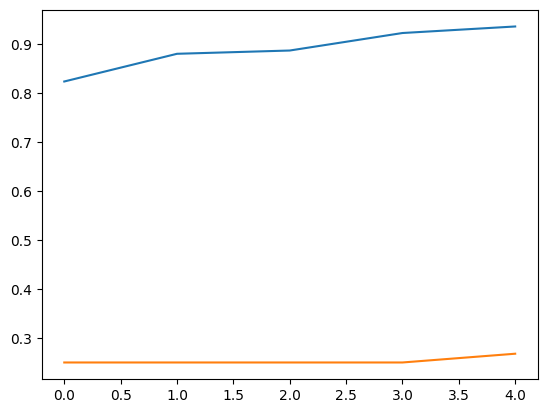

In [15]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend
plt.show()

plt.plot(history.history['acc'] , label = 'train_acc')
plt.plot(history.history['val_acc'] , label = 'val_acc')
plt.legend
plt.show()
     

In [16]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=1,
    shuffle = False,
    class_mode='categorical')
print('original')
print(test_generator.labels)
print('\n')
print('predicted')
test_step = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,steps = test_step , verbose=1)
pred_class_indices = np.argmax(pred,axis=1)
print(pred_class_indices)
print('\n')
     

Found 280 images belonging to 4 classes.
original
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


predicted


<ipython-input-16-9d1bb4373090>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,steps = test_step , verbose=1)


280/280 [==============================] - 109s 389ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]




In [18]:
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score,jaccard_score,classification_report
from sklearn.metrics import precision_score,recall_score,jaccard_score


## Classwise performance analysis

classes = [0,1,2,3]


for cl in classes:

    print("class: ",cl)

    a1 = np.uint8(test_generator.labels == cl)
    a2 = np.uint8(pred_class_indices == cl)

    print('Accuracy {}'.format(accuracy_score(y_true=a1, y_pred=a2)))
    print('F1 {}'.format(f1_score(y_true=a1, y_pred=a2)))
    print('precision {}'.format(precision_score(y_true=a1, y_pred=a2)))
    print('recall {}'.format(recall_score(y_true=a1, y_pred=a2)))

    print('jaccard {}'.format(jaccard_score(y_true=a1, y_pred=a2)))
    print("_______________________________")


class:  0
Accuracy 0.26071428571428573
F1 0.4034582132564841
precision 0.2527075812274368
recall 1.0
jaccard 0.2527075812274368
_______________________________
class:  1
Accuracy 0.7142857142857143
F1 0.0
precision 0.0
recall 0.0
jaccard 0.0
_______________________________
class:  2
Accuracy 0.7142857142857143
F1 0.0
precision 0.0
recall 0.0
jaccard 0.0
_______________________________
class:  3
Accuracy 0.8321428571428572
F1 0.11320754716981131
precision 1.0
recall 0.06
jaccard 0.06
_______________________________


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print('Accuracy {}'.format(accuracy_score(y_true=test_generator.labels, y_pred=pred_class_indices)))
print('F1 {}'.format(f1_score(y_true=test_generator.labels, y_pred=pred_class_indices,average = "macro")))
print('precision {}'.format(precision_score(y_true=test_generator.labels, y_pred=pred_class_indices,average = "macro")))
print('recall {}'.format(recall_score(y_true=test_generator.labels, y_pred=pred_class_indices,average = "macro")))

print('jaccard {}'.format(jaccard_score(y_true=test_generator.labels, y_pred=pred_class_indices,average = "macro")))
print('confusion_matrix\n {}'.format(confusion_matrix(y_true=test_generator.labels, y_pred=pred_class_indices)))
print('classification_report\n {}'.format(classification_report(y_true=test_generator.labels, y_pred=pred_class_indices)))
print('\n\n')
     

Accuracy 0.26071428571428573
F1 0.12916644010657385
precision 0.3131768953068592
recall 0.265
jaccard 0.0781768953068592
confusion_matrix
 [[70  0  0  0]
 [80  0  0  0]
 [80  0  0  0]
 [47  0  0  3]]
classification_report
               precision    recall  f1-score   support

           0       0.25      1.00      0.40        70
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        80
           3       1.00      0.06      0.11        50

    accuracy                           0.26       280
   macro avg       0.31      0.27      0.13       280
weighted avg       0.24      0.26      0.12       280






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [24]:
!jupyter nbconvert --to html /content/liver_cancer.ipynb

[NbConvertApp] Converting notebook /content/liver_cancer.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][8]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stderr',
 'output_type': 'stream',
 'text': '<ipython-input-10-935e3b47d052>:4: UserWarning: '
         '`Model.fit_gener...'}
[NbConvertApp] Writing 860219 bytes to /content/liver_cancer.html
